# Demo

In [0]:
data = [
    (1, "Alice", 30, 70000.0),
    (2, "Bob", 25, 48000.0),
    (3, "Charlie", 35, 120000.0),
    (4, "David", 28, 54000.0)
]

columns = ["id", "name", "age", "salary"]

df=spark.createDataFrame(data, columns)
display(df)

id,name,age,salary
1,Alice,30,70000.0
2,Bob,25,48000.0
3,Charlie,35,120000.0
4,David,28,54000.0


In [0]:
# Read streaming data from a socket (simulated source)
lines = spark.readStream.format("socket").option("host", "localhost").option("port", 9999).load()
# Split the lines into words
words = lines.selectExpr("explode(split(value, ' ')) as word")
# Count the number of words
wordCounts = words.groupBy("word").count()
# Start the streaming query to console
query = wordCounts.writeStream.outputMode("complete").format("console").start()
# Await termination (keep it running)
query.awaitTermination()

Hello World!


# Exercise

In [0]:
# Task 1: Load the Dataset
# Load a CSV file into a Spark DataFrame in Databricks.
# Display the first 10 rows and inspect the schema of the dataset.
data = 'file:/Workspace/Shared/data.csv'
df = spark.read.csv(data, header=True, inferSchema=True)
display(df.limit(10))


FL_DATE,CARRIER,ORIGIN,DEST,DEP_DELAY,ARR_DELAY
2023-09-01,AA,ATL,DFW,5,10
2023-09-01,UA,LAX,JFK,-3,0
2023-09-01,DL,SFO,ORD,7,15
2023-09-02,AA,DFW,LAX,0,-5
2023-09-02,UA,JFK,ATL,-2,0
2023-09-02,DL,ORD,LAX,20,30
2023-09-03,AA,LAX,SFO,10,12
2023-09-03,UA,ATL,ORD,0,-10
2023-09-03,DL,SFO,JFK,5,25
2023-09-04,AA,JFK,LAX,0,0


In [0]:
# Task 2: Data Cleaning
# Drop any rows containing null values.
# Filter out rows where a specific column (e.g., ARR_DELAY) is less than or equal to zero.
drop_df = df.na.drop()
filter_df = drop_df.filter(df.ARR_DELAY > 0)
display(filter_df)


FL_DATE,CARRIER,ORIGIN,DEST,DEP_DELAY,ARR_DELAY
2023-09-01,AA,ATL,DFW,5,10
2023-09-01,DL,SFO,ORD,7,15
2023-09-02,DL,ORD,LAX,20,30
2023-09-03,AA,LAX,SFO,10,12
2023-09-03,DL,SFO,JFK,5,25
2023-09-04,UA,ORD,ATL,15,20
2023-09-05,AA,LAX,JFK,20,25
2023-09-05,DL,JFK,LAX,10,15


In [0]:
# Task 3: Aggregation and Summary Statistics
# Group the data by a categorical column (e.g., CARRIER) and calculate the average value of a numerical column (e.g., ARR_DELAY).
# Find the minimum, maximum, and mean values for a numerical column (e.g., ARR_DELAY).
from pyspark.sql.functions import avg, min, max
grouped_df = filter_df.groupBy('CARRIER').agg(avg('ARR_DELAY'), min('ARR_DELAY'), max('ARR_DELAY'))
display(grouped_df)

CARRIER,avg(ARR_DELAY),min(ARR_DELAY),max(ARR_DELAY)
UA,20.0,20,20
AA,15.666666666666666,10,25
DL,21.25,15,30


In [0]:
# Task 4: Data Visualization
# Use Databricks' built-in visualizations to create a bar chart showing the total count of entries for each category (e.g., total number of flights per CARRIER).
# Create a histogram that shows the distribution of a numerical column (e.g., distribution of ARR_DELAY).

# Move the file from Workspace to DBFS
dbutils.fs.cp("file:/Workspace/Shared/data.csv", "dbfs:/FileStore/data.csv")
 
# Load the file from DBFS
df = spark.read.format("csv").option("header", "true").load("/FileStore/data.csv")
df.show()


+----------+-------+------+----+---------+---------+
|   FL_DATE|CARRIER|ORIGIN|DEST|DEP_DELAY|ARR_DELAY|
+----------+-------+------+----+---------+---------+
|2023-09-01|     AA|   ATL| DFW|        5|       10|
|2023-09-01|     UA|   LAX| JFK|       -3|        0|
|2023-09-01|     DL|   SFO| ORD|        7|       15|
|2023-09-02|     AA|   DFW| LAX|        0|       -5|
|2023-09-02|     UA|   JFK| ATL|       -2|        0|
|2023-09-02|     DL|   ORD| LAX|       20|       30|
|2023-09-03|     AA|   LAX| SFO|       10|       12|
|2023-09-03|     UA|   ATL| ORD|        0|      -10|
|2023-09-03|     DL|   SFO| JFK|        5|       25|
|2023-09-04|     AA|   JFK| LAX|        0|        0|
|2023-09-04|     UA|   ORD| ATL|       15|       20|
|2023-09-04|     DL|   LAX| SFO|       -5|      -10|
|2023-09-05|     AA|   LAX| JFK|       20|       25|
|2023-09-05|     UA|   DFW| ATL|        0|        0|
|2023-09-05|     DL|   JFK| LAX|       10|       15|
+----------+-------+------+----+---------+----

<function matplotlib.pyplot.show(close=None, block=None)>

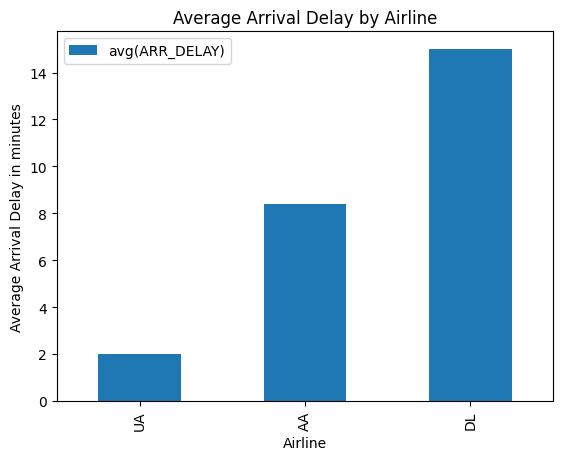

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

df_pandas = df.groupBy('CARRIER').agg({"ARR_DELAY": "avg"}).toPandas()
df_pandas.plot(kind='bar', x='CARRIER', y='avg(ARR_DELAY)', legend=True)
plt.title('Average Arrival Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Arrival Delay in minutes')
plt.show
                      

In [0]:
'''


### **Task 3: Data Cleaning**

1. **Handle missing values**: Drop rows with missing values from the dataset.
   - Use `.na.drop()` to remove rows containing `null` values.
   - Verify if there are any null values left using `.filter()`.

   Example:
   ```python
   df_cleaned = df.na.drop()
   df_cleaned.show()
   ```

2. **Filter rows**: Create a filtered DataFrame where arrival delays are greater than `0`.
   
   Example:
   ```python
   df_filtered = df.filter(df['ARR_DELAY'] > 0)
   df_filtered.show()
   ```

---

### **Task 4: Aggregating and Summarizing the Data**

1. **Find the average arrival delay by airline**:
   - Group by `CARRIER` and calculate the average of `ARR_DELAY`.

   Example:
   ```python
   df.groupBy("CARRIER").agg({"ARR_DELAY": "avg"}).show()
   ```

2. **Count the number of flights per airline**:
   - Group by `CARRIER` and count the total number of flights.

   Example:
   ```python
   df.groupBy("CARRIER").count().show()
   ```

3. **Find the minimum and maximum delay** for all flights:
   - Use `.agg()` to calculate both the minimum and maximum delay.

   Example:
   ```python
   df.agg({"ARR_DELAY": "min", "ARR_DELAY": "max"}).show()
   ```

---

### **Task 5: Visualizing the Data**

1. **Plot the average delay per airline** using Databricks’ built-in visualization tools:
   - Use `display()` to visualize the result from the average delay aggregation.

   Example:
   ```python
   display(df.groupBy("CARRIER").agg({"ARR_DELAY": "avg"}))
   ```

2. **Visualize flight count by airline** using a bar chart:
   - Use the `display()` function and convert the table into a bar chart in the UI.

   Example:
   ```python
   display(df.groupBy("CARRIER").count())
   ```

3. **Plot the distribution of arrival delays** using a histogram:
   - Group by `ARR_DELAY` and count, then use the Databricks visualization tool to create a histogram.

   Example:
   ```python
   display(df.groupBy("ARR_DELAY").count())
   ```

---


'''


# csv and data processing

In [0]:
data = "file:/Workspace/Shared/employee_data.csv"
employee_df = spark.read.csv(data, header=True, inferSchema=True)
employee_df.show()

+----------+-------------+----------+-----------+------+
|EmployeeID|         Name|Department|JoiningDate|Salary|
+----------+-------------+----------+-----------+------+
|      1001|     John Doe|        HR| 2021-01-15| 55000|
|      1002|   Jane Smith|        IT| 2020-03-10| 62000|
|      1003|Emily Johnson|   Finance| 2019-07-01| 70000|
|      1004|Michael Brown|        HR| 2018-12-22| 54000|
|      1005| David Wilson|        IT| 2021-06-25| 58000|
|      1006|  Linda Davis|   Finance| 2020-11-15| 67000|
|      1007| James Miller|        IT| 2019-08-14| 65000|
|      1008|Barbara Moore|        HR| 2021-03-29| 53000|
+----------+-------------+----------+-----------+------+



In [0]:
data = "file:/Workspace/Shared/product_data.json"

from pyspark.sql.types import StructType, StructField, StringType, IntegerType
schema = StructType([
    StructField("ProductID", IntegerType(), True),
    StructField("ProductName", StringType(), True),
    StructField("Category", StringType(), True),
    StructField("Price", IntegerType(), True),
    StructField("Stock", IntegerType(), True)
])

product_df = spark.read.schema(schema).json(data)
product_df.show()

+---------+-----------+-----------+-----+-----+
|ProductID|ProductName|   Category|Price|Stock|
+---------+-----------+-----------+-----+-----+
|      101|     Laptop|Electronics| 1200|   35|
|      102| Smartphone|Electronics|  800|   80|
|      103| Desk Chair|  Furniture|  150|   60|
|      104|    Monitor|Electronics|  300|   45|
|      105|       Desk|  Furniture|  350|   25|
+---------+-----------+-----------+-----+-----+



In [0]:
product_df.createOrReplaceTempView("product_view")

In [0]:
spark.sql('''
    CREATE TABLE delta_product_table
    USING DELTA
    AS SELECT * FROM product_view
''')

DataFrame[num_affected_rows: bigint, num_inserted_rows: bigint]

In [0]:
spark.sql("SELECT * FROM delta_product_table").show()

+---------+-----------+-----------+-----+-----+
|ProductID|ProductName|   Category|Price|Stock|
+---------+-----------+-----------+-----+-----+
|      101|     Laptop|Electronics| 1200|   35|
|      102| Smartphone|Electronics|  800|   80|
|      103| Desk Chair|  Furniture|  150|   60|
|      104|    Monitor|Electronics|  300|   45|
|      105|       Desk|  Furniture|  350|   25|
+---------+-----------+-----------+-----+-----+



# csv->delta and merge 2 delta

In [0]:
emp = "file:/Workspace/Shared/employee_data.csv"
emp_update ="file:/Workspace/Shared/employee_updates.csv"

employee_df = spark.read.csv(emp, header=True, inferSchema=True)
employee_update_df = spark.read.csv(emp_update, header=True, inferSchema=True)

In [0]:

employee_df.write.format("delta").mode("overwrite").save("/delta/employee_data")
employee_update_df.write.format("delta").mode("overwrite").save("/delta/employee_update_data")


In [0]:
delta_emp_df = spark.read.format("delta").load("/delta/employee_data")
delta_emp_update_df = spark.read.format("delta").load("/delta/employee_update_data")

In [0]:
delta_emp_df.createOrReplaceTempView("delta_emp_view")
delta_emp_update_df.createOrReplaceTempView("delta_emp_update_view")

In [0]:
spark.sql('''
MERGE INTO delta_emp_view AS TARGET
USING delta_emp_update_view AS SOURCE
ON TARGET.EmployeeId = SOURCE.EmployeeId
WHEN MATCHED THEN UPDATE SET TARGET.Salary=SOURCE.Salary, TARGET.Department=SOURCE.Department
WHEN NOT MATCHED THEN INSERT (EmployeeId, Name, Department, JoiningDate, Salary) 
VALUES (SOURCE.EmployeeId, SOURCE.Name, SOURCE.Department, SOURCE.JoiningDate, SOURCE.Salary)
''')

spark.sql("SELECT * FROM delta_emp_view").show()


+----------+-------------+----------+-----------+------+
|EmployeeID|         Name|Department|JoiningDate|Salary|
+----------+-------------+----------+-----------+------+
|      1002|   Jane Smith|        IT| 2020-03-10| 62000|
|      1003|Emily Johnson|   Finance| 2019-07-01| 70000|
|      1004|Michael Brown|        HR| 2018-12-22| 54000|
|      1005| David Wilson|        IT| 2021-06-25| 58000|
|      1006|  Linda Davis|   Finance| 2020-11-15| 67000|
|      1007| James Miller|        IT| 2019-08-14| 65000|
|      1008|Barbara Moore|        HR| 2021-03-29| 53000|
|      1001|     John Doe|        HR| 2021-01-15| 58000|
|      1009|  Sarah Adams| Marketing| 2021-09-01| 60000|
|      1010|  Robert King|        IT| 2022-01-10| 62000|
+----------+-------------+----------+-----------+------+



# optimizing delta

In [0]:
spark.sql("CREATE TABLE IF NOT EXISTS delta_employee_table 
          USING DELTA 
          LOCATION '/delta/employee_data'
          ")

DataFrame[]

In [0]:
spark.sql("OPTIMIZE delta_employee_table")

DataFrame[path: string, metrics: struct<numFilesAdded:bigint,numFilesRemoved:bigint,filesAdded:struct<min:bigint,max:bigint,avg:double,totalFiles:bigint,totalSize:bigint>,filesRemoved:struct<min:bigint,max:bigint,avg:double,totalFiles:bigint,totalSize:bigint>,partitionsOptimized:bigint,zOrderStats:struct<strategyName:string,inputCubeFiles:struct<num:bigint,size:bigint>,inputOtherFiles:struct<num:bigint,size:bigint>,inputNumCubes:bigint,mergedFiles:struct<num:bigint,size:bigint>,numOutputCubes:bigint,mergedNumCubes:bigint>,clusteringStats:struct<inputZCubeFiles:struct<numFiles:bigint,size:bigint>,inputOtherFiles:struct<numFiles:bigint,size:bigint>,inputNumZCubes:bigint,mergedFiles:struct<numFiles:bigint,size:bigint>,numOutputZCubes:bigint>,numBins:bigint,numBatches:bigint,totalConsideredFiles:bigint,totalFilesSkipped:bigint,preserveInsertionOrder:boolean,numFilesSkippedToReduceWriteAmplification:bigint,numBytesSkippedToReduceWriteAmplification:bigint,startTimeMs:bigint,endTimeMs:bigint,

In [0]:
spark.sql("DESCRIBE HISTORY delta_employee_table").show(truncate=False)

+-------+-------------------+----------------+----------------------------------+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----+------------------+--------------------+-----------+-----------------+-------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [0]:
spark.sql("OPTIMIZE delta_employee_table ZORDER BY Department")

In [0]:
# retain last 7 days record only
spark.sql("VACUUM delta_employee_table RETAIN 168 HOURS")

# tables

In [0]:
%sql
CREATE TABLE managed_table (
  id INT,
  name STRING
)

In [0]:
%sql
CREATE EXTERNAL TABLE unmanaged_table (
  id INT,
  name STRING
)
LOCATION '/user/data/ecternal_data'

difference
![](/Workspace/Shared/managedVSunmanaged.png)

# Streaming data

In [0]:
dbutils.fs.cp("file:/Workspace/Shared/sales_data2.csv", "dbfs:/FileStore/streaming/input/sales_data2.csv")
dbutils.fs.cp("file:/Workspace/Shared/customer_data.json", "dbfs:/FileStore/streaming/input/customer_data.json")

from pyspark.sql import SparkSession
from pyspark.sql.functions import col

spark = SparkSession.builder.appName("StructuredStreaming").getOrCreate()

sales_schema = "OrderID INT, OrderDate STRING, CustomerID STRING, Product STRING, Quantity INT, Price DOUBLE"
df_sales_stream = spark.readStream.format("csv").option("header", "true").schema(sales_schema).load("dbfs:/FileStore/streaming/input/")

customer_schema = "CustomerID STRING, CustomerName STRING, Region STRING, SignupDate STRING"
df_customers_stream = spark.readStream.format("json").schema(customer_schema).load("dbfs:/FileStore/streaming/input/")


df_sales_stream.printSchema()
df_customers_stream.printSchema()


root
 |-- OrderID: integer (nullable = true)
 |-- OrderDate: string (nullable = true)
 |-- CustomerID: string (nullable = true)
 |-- Product: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Price: double (nullable = true)

root
 |-- CustomerID: string (nullable = true)
 |-- CustomerName: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- SignupDate: string (nullable = true)



In [0]:

from pyspark.sql.functions import current_date, datediff, to_timestamp

# Transform the sales data: Add a new column for total amount
df_sales_transformed = df_sales_stream.select(
    col("OrderID"),
    to_timestamp (col ("OrderDate"), "yyyy-MM-dd HH:mm:ss").alias ("OrderDate"), # Convert OrderDate to TIMESTAMP
    col("Product"),
    col("Quantity"),
    col("Price"),
    (col("Quantity") * col ("Price")).alias("TotalAmount")
)
print("Applied transformations on sales data...")

# Add watermark to handle late data and perform an aggregation
df_sales_aggregated = df_sales_transformed \
    .withWatermark("OrderDate", "1 day") \
    .groupBy("Product") \
    .agg({"TotalAmount": "sum"})

print("Aggregated sales data by product...")

# Transform the customer data: Add a new column for the number of years since signup 
df_customers_transformed = df_customers_stream.withColumn(
    "YearsSinceSignup",
    datediff(current_date(), to_timestamp(col("SignupDate"), "yyyy-MM-dd")).cast("int") / 365
)

print("Applied transformations on customer data...")

Applied transformations on sales data...
Aggregated sales data by product...
Applied transformations on customer data...


In [0]:

# Write the aggregated sales data to a console sink for debugging 
sales_query= df_sales_aggregated.writeStream \
    .outputMode("update") \
    .format("console") \
    .start()

print("Started streaming query to write aggregated sales data to console...")

# Write the transformed customer data to a console sink for debugging 
customers_query = df_customers_transformed.writeStream \
    .outputMode("append") \
    .format("console") \
    .start()

print("Started streaming query to write transformed customer data to console...")

Started streaming query to write aggregated sales data to console...
Started streaming query to write transformed customer data to console...


# operations

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Initialize SparkSession
spark = SparkSession.builder.appName("DeltaOperationsSimpleExample").getOrCreate()

# Define Delta table path
delta_table_path = "/delta/simple_data"

# Define initial sample data
initial_data = [
    (1, 100),
    (2, 200),
    (3, 300)
]

# Define schema
schema = ["ID", "Value"]

# Create DataFrame for initial data
df_initial = spark.createDataFrame(initial_data, schema=schema)

# Write DataFrame to Delta table
df_initial.write.format("delta").mode("overwrite").save(delta_table_path)

print("Initial Delta table created and data written successfully.")

# Define new sample data
new_sample_data = [
    (2, 250),  # Existing ID with updated Value
    (4, 400)   # New ID
]

# Create DataFrame for new data
df_new = spark.createDataFrame(new_sample_data, schema=schema)

# Write the new data to Delta table in append mode
df_new.write.format("delta").mode("append").save(delta_table_path)

print("New data appended to Delta table successfully.")

# Create a temporary view for SQL operations
df_new.createOrReplaceTempView("new_data")

# Perform the merge operation
print("Merging new data into Delta table...")

spark.sql(f"""
MERGE INTO delta.`{delta_table_path}` AS target
USING new_data AS source
ON target.ID = source.ID
WHEN MATCHED THEN UPDATE SET
    target.Value = source.Value
WHEN NOT MATCHED THEN INSERT (
    ID,
    Value
) VALUES (
    source.ID,
    source.Value
)
""")

print("Data merged successfully.")

# Delta operations - History, Time Travel, and Vacuum
print("Viewing Delta table history...")
history_df = spark.sql(f"DESCRIBE HISTORY delta.`{delta_table_path}`")
history_df.show(truncate=False)

print("Querying Delta table as of version 0...")
df_time_travel = spark.read.format("delta").option("versionAsOf", 0).load(delta_table_path)
df_time_travel.show(truncate=False)

print("Vacuuming old files...")
spark.sql(f"VACUUM delta.`{delta_table_path}` RETAIN 168 HOURS")

print("Delta operations completed.")


Initial Delta table created and data written successfully.
New data appended to Delta table successfully.
Merging new data into Delta table...
Data merged successfully.
Viewing Delta table history...
+-------+-------------------+----------------+----------------------------------+---------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----+------------------+--------------------+-----------+-----------------+-------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------